# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
from sklearn.preprocessing import Binarizer

df = pd.read_csv('https://raw.githubusercontent.com/jonpb99/Data_Analytics_List_Comprehension/main/Logistic_Regression/HDMA%20Boston%20Housing%20Data.csv')
df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2381 non-null   int64  
 1   dir          2381 non-null   float64
 2   hir          2381 non-null   float64
 3   lvr          2381 non-null   float64
 4   ccs          2381 non-null   float64
 5   mcs          2381 non-null   float64
 6   pbcr         2380 non-null   object 
 7   dmi          2381 non-null   object 
 8   self         2380 non-null   object 
 9   single       2381 non-null   object 
 10  uria         2381 non-null   float64
 11  comdominiom  2381 non-null   int64  
 12  black        2381 non-null   object 
 13  deny         2381 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 260.5+ KB


In [7]:
df['deny'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
df.columns[df.isnull().any()]

Index(['pbcr', 'self'], dtype='object')

<AxesSubplot:xlabel='deny', ylabel='count'>

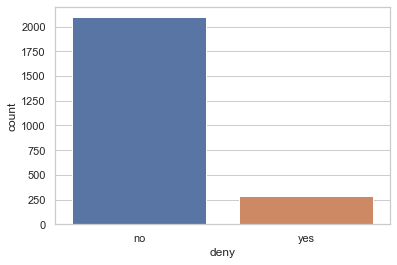

In [9]:
sns.set(style='whitegrid')
sns.countplot(x="deny", data=df)

<AxesSubplot:xlabel='black', ylabel='count'>

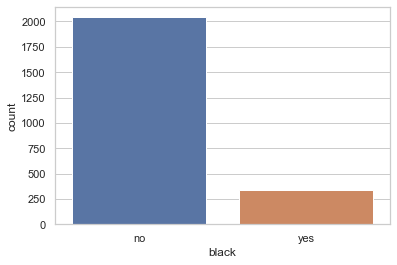

In [10]:
sns.countplot(x="black", data=df)

<AxesSubplot:xlabel='dmi', ylabel='count'>

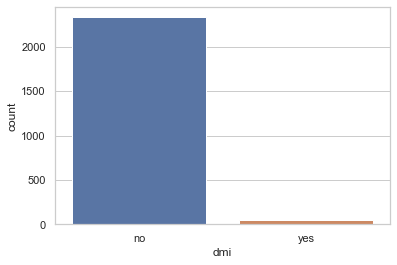

In [11]:
sns.countplot(x="dmi", data=df)

<AxesSubplot:xlabel='pbcr', ylabel='count'>

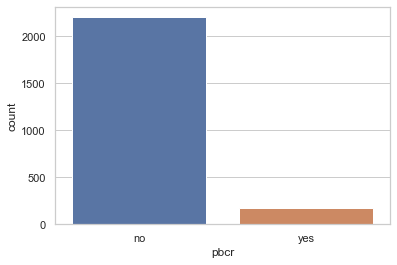

In [12]:
sns.countplot(x="pbcr", data=df)

<AxesSubplot:xlabel='single', ylabel='count'>

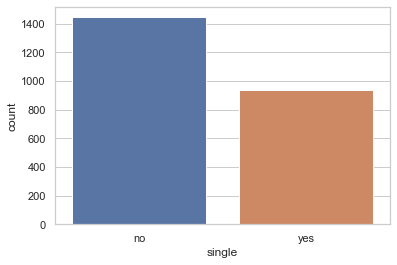

In [17]:
sns.countplot(x="single", data=df)

<AxesSubplot:xlabel='self', ylabel='count'>

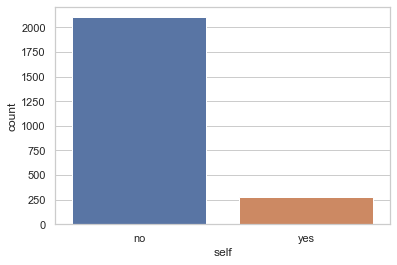

In [18]:
sns.countplot(x="self", data=df)

<AxesSubplot:xlabel='comdominiom', ylabel='count'>

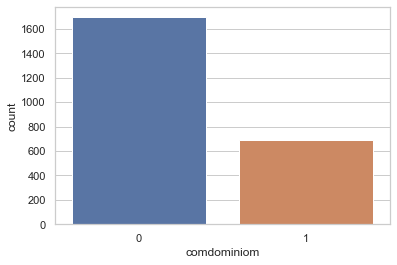

In [23]:
sns.countplot(x="comdominiom", data=df)

<AxesSubplot:xlabel='dir', ylabel='hir'>

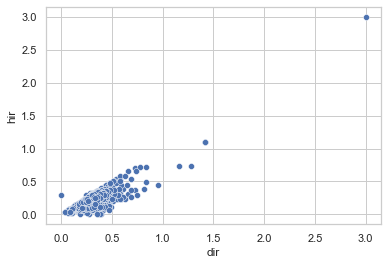

In [13]:
sns.scatterplot(x = "dir", y = "hir", data = df)

<AxesSubplot:xlabel='dir', ylabel='lvr'>

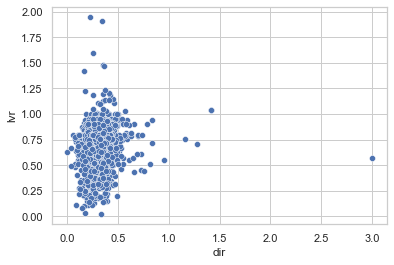

In [49]:
sns.scatterplot(x = "dir", y = "lvr", data = df)

In [27]:
df['uria'].unique()

array([ 3.9000001 ,  3.20000005,  4.30000019,  1.79999995,  3.0999999 ,
       10.60000038,  5.30000019,  3.5999999 ,  2.        ,  8.89999962,
        3.77449585])

<AxesSubplot:xlabel='uria', ylabel='count'>

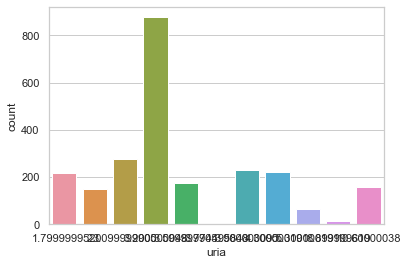

In [43]:
sns.countplot(x="uria", data=df)

<AxesSubplot:xlabel='ccs', ylabel='count'>

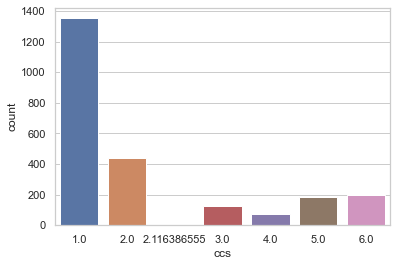

In [35]:
sns.countplot(x="ccs", data=df)

<AxesSubplot:xlabel='mcs', ylabel='count'>

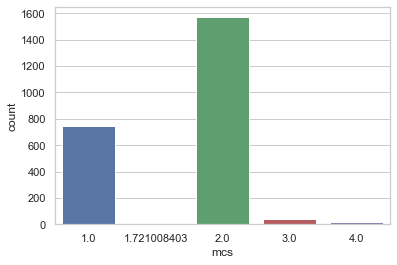

In [36]:
sns.countplot(x="mcs", data=df)

In [44]:
df1 = df.dropna()
#df1 = df[df['self']!='NA']

#df1.uria = df1.uria.astype(int)
#df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2380 non-null   int64  
 1   dir          2380 non-null   float64
 2   hir          2380 non-null   float64
 3   lvr          2380 non-null   float64
 4   ccs          2380 non-null   float64
 5   mcs          2380 non-null   float64
 6   pbcr         2380 non-null   object 
 7   dmi          2380 non-null   object 
 8   self         2380 non-null   object 
 9   single       2380 non-null   object 
 10  uria         2380 non-null   float64
 11  comdominiom  2380 non-null   int64  
 12  black        2380 non-null   object 
 13  deny         2380 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 278.9+ KB


In [59]:
df2 = df1.copy()
for i in df2.index:
    #print(df5.loc[i,'symbolizing'])
    if df2.loc[i,'pbcr'] == 'yes':
        df2.loc[i,'pbcr'] = 1
    else:
        df2.loc[i,'pbcr'] = 0
        
    if df2.loc[i,'dmi'] == 'yes':
        df2.loc[i,'dmi'] = 1
    else:
        df2.loc[i,'dmi'] = 0
    
    if df2.loc[i,'self'] == 'yes':
        df2.loc[i,'self'] = 1
    else:
        df2.loc[i,'self'] = 0
        
    if df2.loc[i,'single'] == 'yes':
        df2.loc[i,'single'] = 1
    else:
        df2.loc[i,'single'] = 0
    
    if df2.loc[i,'black'] == 'yes':
        df2.loc[i,'black'] = 1
    else:
        df2.loc[i,'black'] = 0
        
    if df2.loc[i,'deny'] == 'yes':
        df2.loc[i,'deny'] = 1
    else:
        df2.loc[i,'deny'] = 0
    df2.loc[i,'uria'] = round(df2.loc[i,'uria'],5)
        
df2["pbcr"] = pd.to_numeric(df2["pbcr"])
df2["dmi"] = pd.to_numeric(df2["dmi"])
df2["self"] = pd.to_numeric(df2["self"])
df2["single"] = pd.to_numeric(df2["single"])
df2["black"] = pd.to_numeric(df2["black"])
df2["deny"] = pd.to_numeric(df2["deny"])

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2380 non-null   int64  
 1   dir          2380 non-null   float64
 2   hir          2380 non-null   float64
 3   lvr          2380 non-null   float64
 4   ccs          2380 non-null   float64
 5   mcs          2380 non-null   float64
 6   pbcr         2380 non-null   int64  
 7   dmi          2380 non-null   int64  
 8   self         2380 non-null   int64  
 9   single       2380 non-null   int64  
 10  uria         2380 non-null   float64
 11  comdominiom  2380 non-null   int64  
 12  black        2380 non-null   int64  
 13  deny         2380 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 343.4 KB


In [65]:
df3 = df2[['dir','hir','lvr','ccs','mcs','pbcr','dmi','uria','black','deny']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dir     2380 non-null   float64
 1   hir     2380 non-null   float64
 2   lvr     2380 non-null   float64
 3   ccs     2380 non-null   float64
 4   mcs     2380 non-null   float64
 5   pbcr    2380 non-null   int64  
 6   dmi     2380 non-null   int64  
 7   uria    2380 non-null   float64
 8   black   2380 non-null   int64  
 9   deny    2380 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 269.1 KB


<AxesSubplot:xlabel='uria', ylabel='count'>

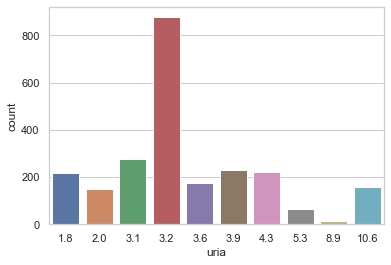

In [62]:
sns.countplot(x="uria", data=df2)

<AxesSubplot:xlabel='mcs', ylabel='count'>

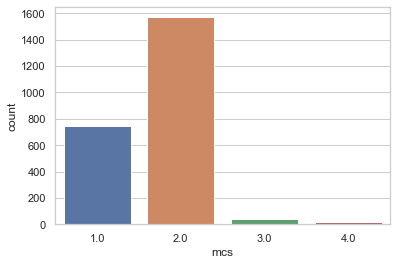

In [66]:
sns.countplot(x="mcs", data=df3)

<AxesSubplot:xlabel='ccs', ylabel='count'>

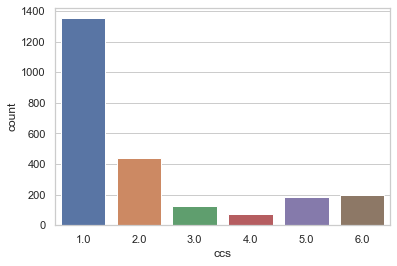

In [67]:
sns.countplot(x="ccs", data=df3)

In [68]:
df4 = df3[df3['black']==1]
#subset of black entries
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 29 to 2378
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dir     339 non-null    float64
 1   hir     339 non-null    float64
 2   lvr     339 non-null    float64
 3   ccs     339 non-null    float64
 4   mcs     339 non-null    float64
 5   pbcr    339 non-null    int64  
 6   dmi     339 non-null    int64  
 7   uria    339 non-null    float64
 8   black   339 non-null    int64  
 9   deny    339 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 29.1 KB


In [70]:
df5 = df3[df3['black']==0]
#subset of black entries
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 0 to 2379
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dir     2041 non-null   float64
 1   hir     2041 non-null   float64
 2   lvr     2041 non-null   float64
 3   ccs     2041 non-null   float64
 4   mcs     2041 non-null   float64
 5   pbcr    2041 non-null   int64  
 6   dmi     2041 non-null   int64  
 7   uria    2041 non-null   float64
 8   black   2041 non-null   int64  
 9   deny    2041 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 175.4 KB


<AxesSubplot:xlabel='deny', ylabel='count'>

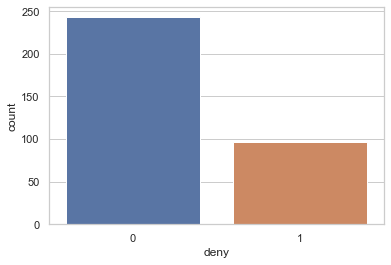

In [81]:
sns.countplot(x="deny", data=df4)

<AxesSubplot:xlabel='deny', ylabel='count'>

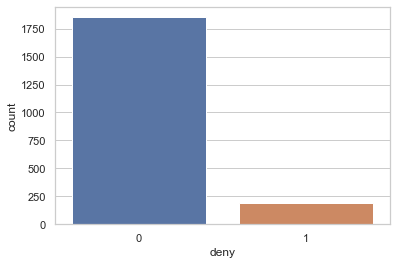

In [71]:
sns.countplot(x="deny", data=df5)

<AxesSubplot:xlabel='dmi', ylabel='count'>

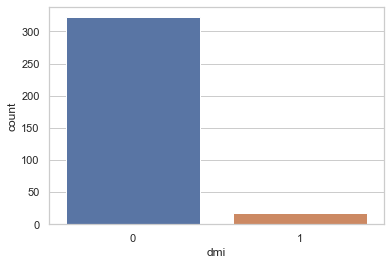

In [72]:
sns.countplot(x="dmi", data=df4)

<AxesSubplot:xlabel='dmi', ylabel='count'>

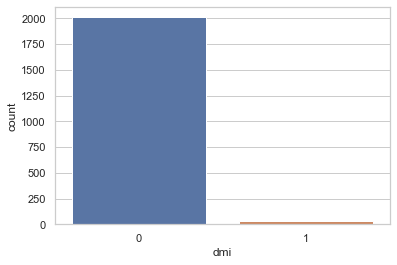

In [73]:
sns.countplot(x="dmi", data=df5)

<AxesSubplot:xlabel='pbcr', ylabel='count'>

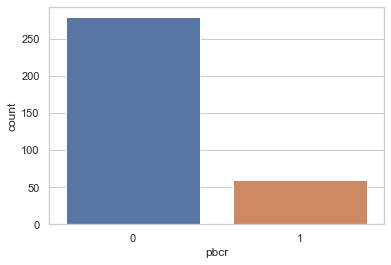

In [74]:
sns.countplot(x="pbcr", data=df4)

<AxesSubplot:xlabel='pbcr', ylabel='count'>

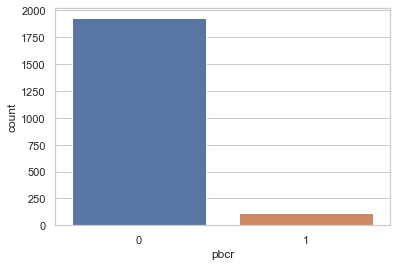

In [75]:
sns.countplot(x="pbcr", data=df5)

<AxesSubplot:xlabel='black', ylabel='ccs'>

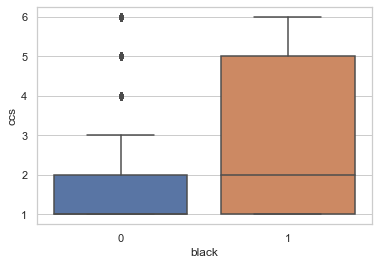

In [76]:
sns.boxplot(x="black", y="ccs", data=df3)

<AxesSubplot:xlabel='black', ylabel='mcs'>

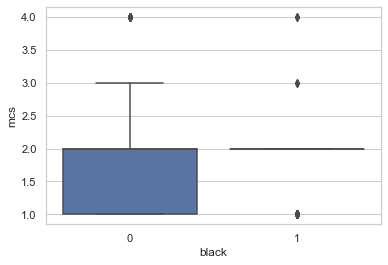

In [77]:
sns.boxplot(x="black", y="mcs", data=df3)

<AxesSubplot:xlabel='mcs', ylabel='count'>

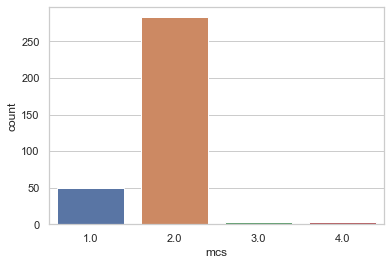

In [78]:
sns.countplot(x="mcs", data=df4)

<AxesSubplot:xlabel='mcs', ylabel='count'>

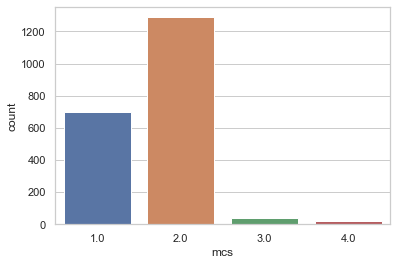

In [79]:
sns.countplot(x="mcs", data=df5)

<AxesSubplot:xlabel='dir', ylabel='hir'>

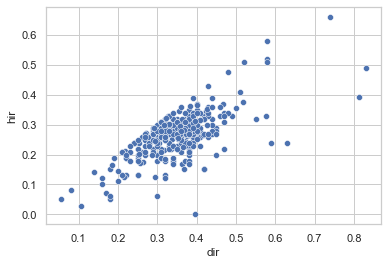

In [82]:
sns.scatterplot(x = "dir", y = "hir", data = df4)

<AxesSubplot:xlabel='dir', ylabel='hir'>

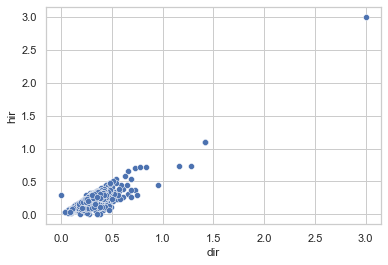

In [83]:
sns.scatterplot(x = "dir", y = "hir", data = df5)

<AxesSubplot:xlabel='black', ylabel='lvr'>

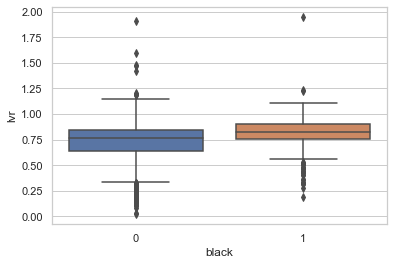

In [86]:
sns.boxplot(x="black", y="lvr", data=df3)